## Лабораторна робота **No. 1.1** студентки **Іванченко О. В.**

---
###Завдання 1: Вибір варіанту завдання.
  * Оберіть один з 10 варіантів завдань відповідно до свого номеру в групі або за вказівкою викладача.


    Варіант 5: Навчальний час і результати тесту
    Опис: Залежність балів за тест (0-100) від кількості годин навчання.

***
### Завдання 2: Підготовка даних
- Імпортуйте необхідні бібліотеки;
- Завантажте дані відповідно до вашого варіанту;
- Візуалізуйте дані для розуміння їх структури.

In [ ]:
# Імпорт бібліотек

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Дані віповідно до варіанту

x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])           # години навчання
y_train = np.array([30, 40, 45, 55, 60, 70, 75, 85, 90, 95])  # бали за тест

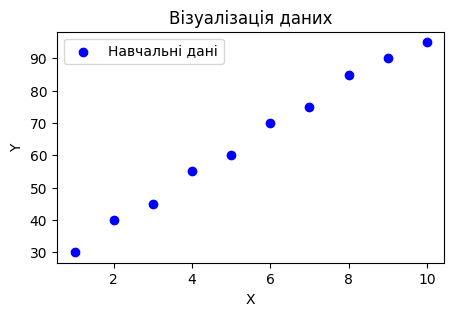

In [ ]:
# Візуалізація даних

plt.figure(figsize=(5, 3))
plt.scatter(x_train, y_train, color='blue', label='Навчальні дані')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Візуалізація даних')
plt.legend()
plt.show()

---
### Завдання 3: Реалізація функцій.
-  Реалізуйте функцію обчислення вихідних значень моделі compute_model_output;
-  Реалізуйте функцію обчислення вартості compute_cost;
-  Реалізуйте функцію обчислення градієнту compute_gradient;
-  Реалізуйте функцію градієнтного спуску gradient_descent;

In [ ]:
# Функція обчислення вихідних значень моделі compute_model

def compute_model(x, w, b):
    """
    Обчислює вихідні значення моделі

    Аргументи:
    x -- вхідні дані (масив розміром m)
    w -- ваговий коефіцієнт
    b -- зміщення

    Повертає:
    y_pred терація 3750: cost = 1.1212690575002533-- прогнозовані значення
    """
    m = x.shape[0]
    y_pred = np.zeros(m)

    for i in range(m):
        y_pred[i] = w * x[i] + b

    return y_pred

In [ ]:
# Функція обчислення вартості compute_cost

def compute_cost(y, y_pred):
    """
    Обчислює функцію вартості (середньоквадратичну помилку)

    Аргументи:
    y -- цільові значення
    y_pred -- прогнозовані значення

    Повертає:
    cost -- значення функції вартості
    """
    m = len(y)
    total_cost = 0.0

    for i in range(m):
        total_cost += (y_pred[i] - y[i])**2

    cost = total_cost / (2 * m)
    return cost

In [ ]:
# Функція обчислення градієнтів

def compute_gradient(x, y, y_pred):
    """
    Обчислює градієнти для w і b

    Аргументи:
    x -- вхідні дані
    y -- цільові значення
    y_pred -- прогнозовані значення

    Повертає:
    dw -- градієнт для w
    db -- градієнт для b
    """
    m = len(y)
    dw = 0
    db = 0

    for i in range(m):
        dw += (y_pred[i] - y[i]) * x[i]
        db += (y_pred[i] - y[i])

    dw = dw / m
    db = db / m

    return dw, db

In [ ]:
# Функція градієнтного спуску gradient_descent

def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    """
    Виконує градієнтний спуск для знаходження оптимальних значень w і b

    Аргументи:
    x -- вхідні дані
    y -- цільові значення
    w_init -- початкове значення w
    b_init -- початкове значення b
    alpha -- швидкість навчання
    num_iters -- кількість ітерацій

    Повертає:
    w -- оптимальне значення w
    b -- оптимальне значення b
    J_history -- історія зміни функції вартості
    w_history -- історія зміни w
    b_history -- історія зміни b
    """
    w = w_init
    b = b_init
    J_history = []
    w_history = []
    b_history = []

    for i in range(num_iters):
        # Обчислюємо прогнозовані значення
        y_pred = compute_model(x, w, b)

        # Обчислюємо функцію вартості
        cost = compute_cost(y, y_pred)

        # Обчислюємо градієнти
        dw, db = compute_gradient(x, y, y_pred)

        # Оновлюємо параметри
        w = w - alpha * dw
        b = b - alpha * db

        # Зберігаємо історію
        if i % 100 == 0:
            J_history.append(cost)
            w_history.append(w)
            b_history.append(b)
            print(f"Ітерація {i}: cost = {cost}")

    return w, b, J_history, w_history, b_history

---

### Завдання 4: Запуск градієнтного спуску

  - Ініціалізуйте початкові значення параметрів
  - Виконайте алгоритм градієнтного спуску для знаходження оптимальних параметрів

In [ ]:
# Початкові значення

w_init = 7        # початкове значення w
b_init = 30        # початкове значення b
alpha = 0.01        # швидкість навчання
iterations = 1001   # кількість ітерацій

In [ ]:
# Виконуємо алгоритм градієнтного спуску для знаходження оптимальних параметрів

w_opt, b_opt, J_history, w_history, b_history = \
gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)

Ітерація 0: cost = 9.5
Ітерація 100: cost = 3.324131197031415
Ітерація 200: cost = 2.5680608072991307
Ітерація 300: cost = 2.0714835784844103
Ітерація 400: cost = 1.7453380931882176
Ітерація 500: cost = 1.5311299672276777
Ітерація 600: cost = 1.3904408475059664
Ітерація 700: cost = 1.2980380578390722
Ітерація 800: cost = 1.2373491036746551
Ітерація 900: cost = 1.197489385468655
Ітерація 1000: cost = 1.1713100393695746


---
### Завдання 5: Аналіз та візуалізація результатів
  - Візуалізуйте дані та отриману модель
  - Проаналізуйте процес навчання (зміну функції вартості)
  - Використайте модель для прогнозування

In [ ]:
# Прогнозування

y_pred = compute_model(x_train, w_opt, b_opt)
print(y_pred) #30, 40, 45, 55, 60, 70, 75, 85, 90, 95

[32.22067926 39.4257     46.63072074 53.83574147 61.04076221 68.24578295
 75.45080368 82.65582442 89.86084515 97.06586589]


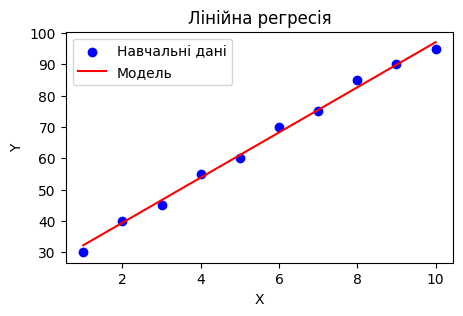

In [ ]:
# Візуалізація навченої моделі

plt.figure(figsize=(5, 3))
plt.scatter(x_train, y_train, color='blue', label='Навчальні дані')
plt.plot(x_train, y_pred, color='red', label='Модель')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Лінійна регресія')
plt.legend()
plt.show()



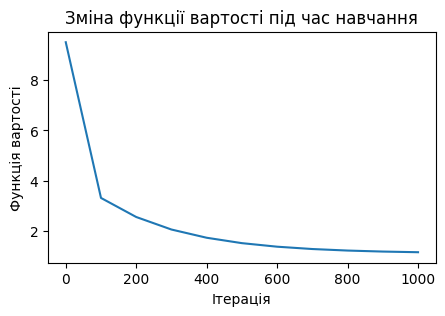

In [ ]:
# Візуалізація історії функції вартості

plt.figure(figsize=(5, 3))
plt.plot(range(0, iterations, 100), J_history)
plt.xlabel('Ітерація')
plt.ylabel('Функція вартості')
plt.title('Зміна функції вартості під час навчання')
plt.show()

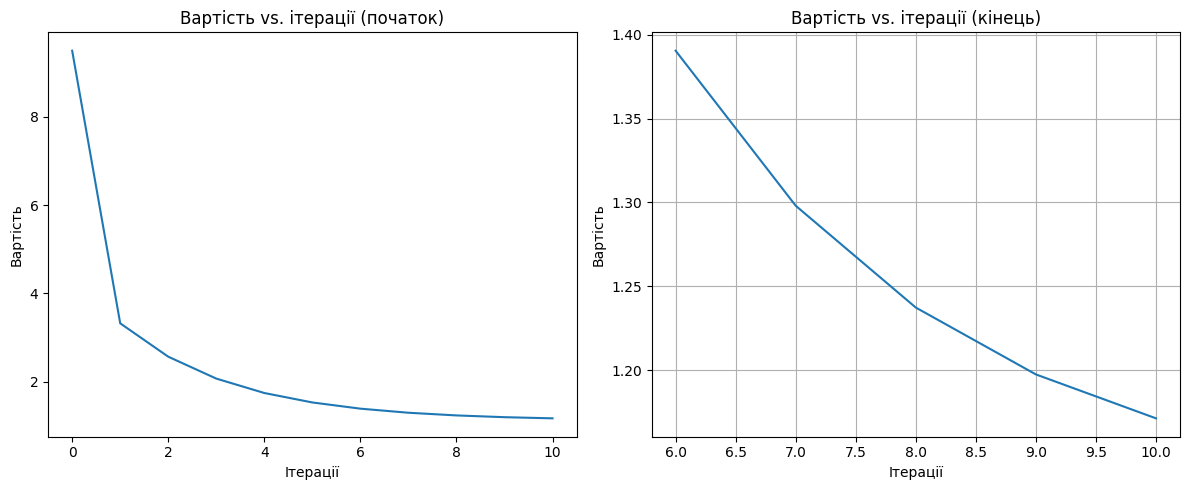

In [ ]:
# Візуалізація зміни функції вартості

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(J_history[:100])
plt.title('Вартість vs. ітерації (початок)')
plt.xlabel('Ітерації')
plt.ylabel('Вартість')

plt.subplot(1, 2, 2)
plt.plot(range(len(J_history) - 5, len(J_history)), J_history[-5:])
plt.title('Вартість vs. ітерації (кінець)')
plt.xlabel('Ітерації')
plt.ylabel('Вартість')
plt.grid(True)
plt.tight_layout()
plt.show()

Аналіз процесу навчання:


На початку навчання видно різке зменшення ватості, що говорить про хорошу початкову швидкість навчання.

Надалі значення зменшуються все повільніше: це говорить про те, що модель приходить до оптимального стану, через це градієнт стає меншим.

Останні значення не сильно відрізняються одне від одного. Це вказує на те, що модель досягла оптимальних результатів і проводити далі тренування не принесе значного результату.

---
### Завдання 6: Додаткові завдання.

  - Експериментуйте з різними значеннями швидкості навчання (alpha)
  - Проаналізуйте, як швидкість навчання впливає на збіжність алгоритму
  - Оцініть якість моделі (наприклад, обчисліть коефіцієнт детермінації R²)

In [ ]:
# Експеримент зі значенням швидкості навчання


alphas = [0.999, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    print(f'alpha = {alpha}')
    w_final, b_final, J_history, _, _ = \
      gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)
    print()


alpha = 0.999
Ітерація 0: cost = 9.5
Ітерація 100: cost = inf
Ітерація 200: cost = nan
Ітерація 300: cost = nan
Ітерація 400: cost = nan
Ітерація 500: cost = nan
Ітерація 600: cost = nan
Ітерація 700: cost = nan
Ітерація 800: cost = nan
Ітерація 900: cost = nan
Ітерація 1000: cost = nan

alpha = 0.1
Ітерація 0: cost = 9.5
Ітерація 100: cost = 1.1093103815694026e+94
Ітерація 200: cost = 2.44903903689004e+187
Ітерація 300: cost = 5.406775510137978e+280
Ітерація 400: cost = inf
Ітерація 500: cost = inf
Ітерація 600: cost = inf
Ітерація 700: cost = nan
Ітерація 800: cost = nan
Ітерація 900: cost = nan
Ітерація 1000: cost = nan

alpha = 0.01
Ітерація 0: cost = 9.5
Ітерація 100: cost = 3.324131197031415
Ітерація 200: cost = 2.5680608072991307
Ітерація 300: cost = 2.0714835784844103
Ітерація 400: cost = 1.7453380931882176
Ітерація 500: cost = 1.5311299672276777
Ітерація 600: cost = 1.3904408475059664
Ітерація 700: cost = 1.2980380578390722
Ітерація 800: cost = 1.2373491036746551
Ітерація 900:

<ipython-input-5-a3b3b24dd37e>:18: RuntimeWarning: overflow encountered in scalar add
  total_cost += (y_pred[i] - y[i])**2
<ipython-input-5-a3b3b24dd37e>:18: RuntimeWarning: overflow encountered in scalar power
  total_cost += (y_pred[i] - y[i])**2
<ipython-input-6-166cb62414a2>:21: RuntimeWarning: overflow encountered in scalar add
  dw += (y_pred[i] - y[i]) * x[i]
<ipython-input-6-166cb62414a2>:21: RuntimeWarning: overflow encountered in scalar multiply
  dw += (y_pred[i] - y[i]) * x[i]
<ipython-input-6-166cb62414a2>:22: RuntimeWarning: overflow encountered in scalar add
  db += (y_pred[i] - y[i])
<ipython-input-7-ba435dd440c9>:39: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - alpha * dw
<ipython-input-7-ba435dd440c9>:40: RuntimeWarning: invalid value encountered in scalar subtract
  b = b - alpha * db


Ітерація 700: cost = 4.398432584383927
Ітерація 800: cost = 4.373720372931542
Ітерація 900: cost = 4.355094246816256
Ітерація 1000: cost = 4.339268524598791



Аналіз результатів:
- alpha ~1: на першій ітерації з'явилися значення inf та nan, що говорить про занадто велику швидкість навчання, що викликає переповнення;
- alpha = 0.1: бачимо стрімке зменшення значення і одразу його зростання, а після маємо значення inf та nan. Це також говорить про те, що швидкість навчання залишається досить великою;
- alpha = 0.01: функція спочатку стрімко зменшується, а потім стабілізується, досягаючи помірних значень. Можна сказати, що досягнуто оптимальної швидкості навчання;
- alpha = 0.001:  навчання просувається стабільно, хоч і повільніше. Дане значчення можна використати для більш точного навчання моделі;
- alpha = 0.0001: процес заменшення резултатів функції відбувається дуже повільно.   

Отже, оптимальними значеннями alpha є:
- Для більш швидкого навчання: 0.01;
- Для більш точного навчання: 0.001.